<a href="https://colab.research.google.com/github/franckepeixoto/IGTI-Analista-de-Machine-Learning/blob/main/M%C3%B3dulo_4_Metodologias_de_Aprendizado_(Trabalho_Pr%C3%A1tico).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
import matplotlib as mpl
(xtrain,ytrain),(xtest,ytest) = keras.datasets.fashion_mnist.load_data()

In [78]:
labels =['Camisetas/Top (T-shirt/top)','Calça (Trouser)','Suéter (Pullover)','Vestidos (Dress)','Casaco (Coat)','Sandálias (Sandal)','Camisas (Shirt)','Tênis (Sneaker)','Bolsa (Bag)','Botas (Ankle boot)']
labels[0]

'Camisetas/Top (T-shirt/top)'

In [79]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

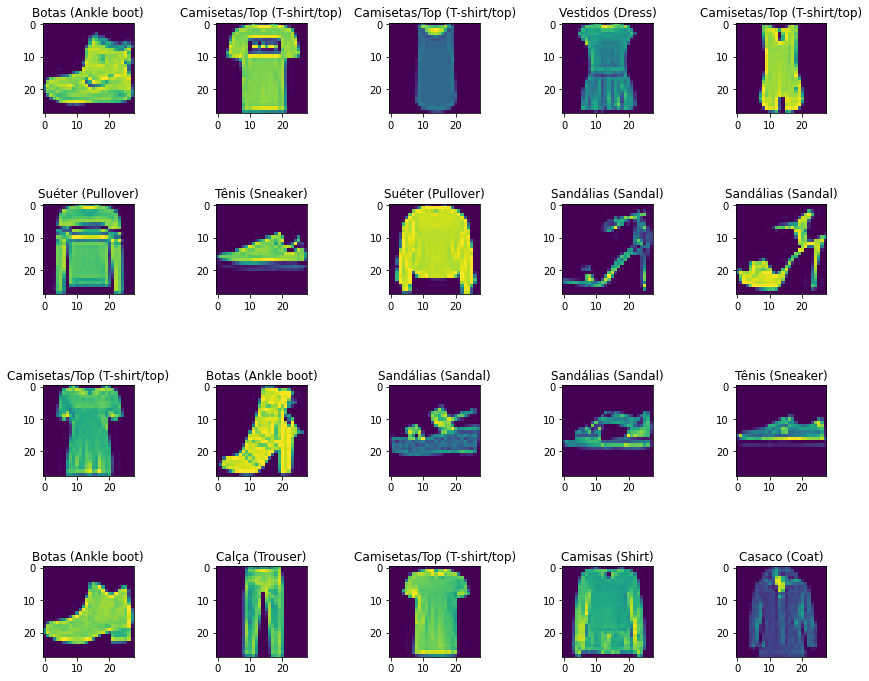

In [121]:
index = 0    
fig = plt.figure(figsize = (15,15))
for item in xtrain[:20]:
    index += 1
    plt.subplot(5, 5, index)
    plt.imshow(item)
    plt.subplots_adjust(hspace = 1)
    plt.title(labels[ytrain[int(index-1)]])
plt.show()

In [81]:
print('Antes:',(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape))
xtrain = xtrain /255.0
xtest = xtest /255.0
print('Depois:',(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape))

Antes: ((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))
Depois: ((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))


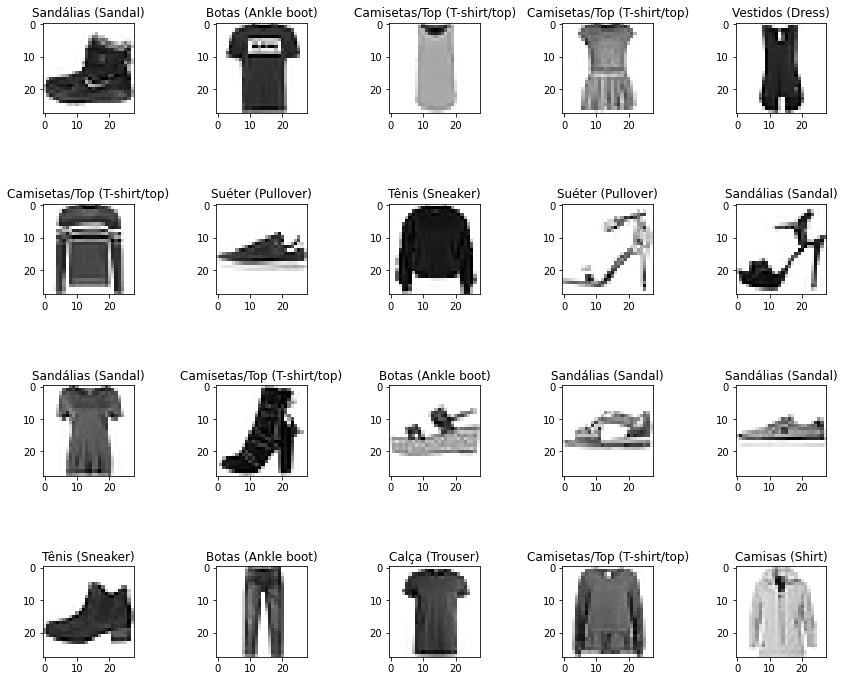

In [120]:
index = 0    
fig = plt.figure(figsize = (15,15))
for index in range(20):
    plt.subplot(5, 5, index+1)
    plt.subplots_adjust(hspace = 1)
    plt.imshow(xtrain[index], cmap=plt.cm.binary)
    plt.title(labels[ytrain[int(index-1)]])
plt.show()

In [83]:

model = keras.models.Sequential()  
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
model.summary()    

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.fit(xtrain,ytrain,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6386 - accuracy: 0.7761
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3867 - accuracy: 0.8588
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3446 - accuracy: 0.8749
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3167 - accuracy: 0.8834
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2914 - accuracy: 0.8938
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2808 - accuracy: 0.8982
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2677 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2545 - accuracy: 0.9030
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2440 - accuracy: 0.9087
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.234

In [85]:
test_loss,test_acc = model.evaluate(xtest,ytest)
print('Accuracy: ',test_acc)
print('Loss: ',test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.3332 - accuracy: 0.8871
Accuracy:  0.8870999813079834
Loss:  0.3332086205482483


In [86]:
p = model.predict(xtest)

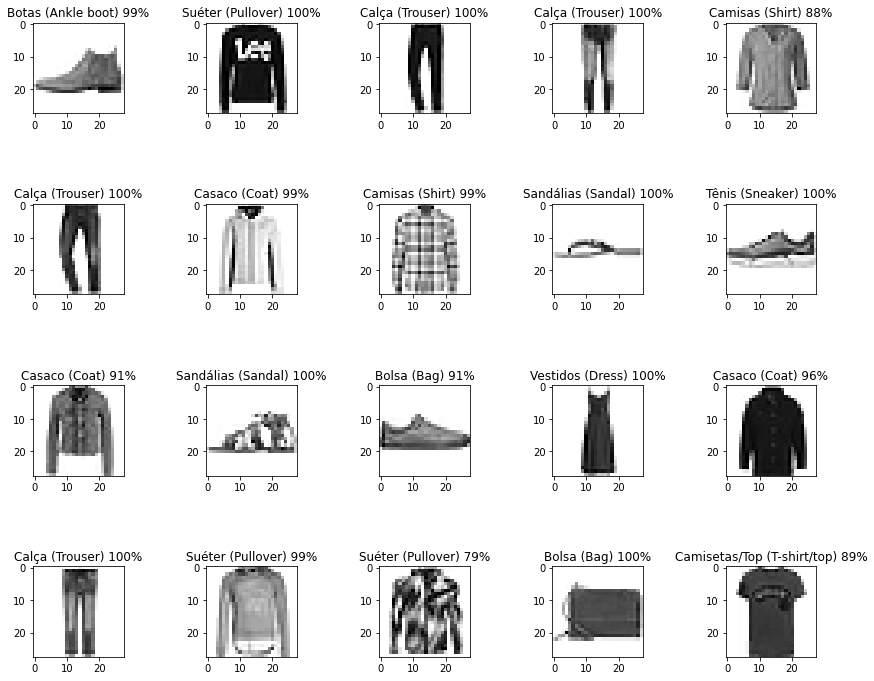

In [119]:
index = 0    
fig = plt.figure(figsize = (15,15))
for index in range(20):
    plt.subplot(5, 5, index+1)
    plt.imshow(xtest[index], cmap=plt.cm.binary)
    plt.subplots_adjust(hspace = 1)
    pred = np.argmax(p[index])
    plt.title(labels[int(pred)] + " {:2.0f}%".format(100*np.max(p[index])))
plt.show()